#### <b>Load Required Libraries</b>

In [2]:
!pip install pytorch-msssim

In [3]:
import torch
from torch import optim

import torchvision.transforms as transforms
from torchvision.utils import save_image

import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

from pytorch_msssim import SSIM, MS_SSIM

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
def image_loader(img_path, imsize):
    loader = transforms.Compose([
        transforms.Resize(imsize),
        transforms.ToTensor()
    ])
    image = PIL.Image.open(img_path)
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


def imshow(tensor):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    plt.show()

#### <b>Prepare Images</b>

In [6]:
!git clone https://github.com/ndb796/SSIM-Implementations-for-PyTorch-and-TensorFlow
%cd SSIM-Implementations-for-PyTorch-and-TensorFlow

Cloning into 'SSIM-Implementations-for-PyTorch-and-TensorFlow'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
/content/SSIM-Implementations-for-PyTorch-and-TensorFlow


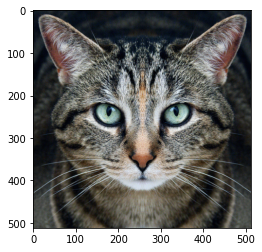

In [7]:
img_path = './images/cat.jpg'
target_image = image_loader(img_path, (512, 512))
imshow(target_image)

#### <b>PyTorch SSIM</b>

[ Start ]


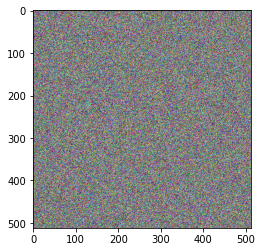

[ Step: 50 ]
Loss: 0.29864203929901123


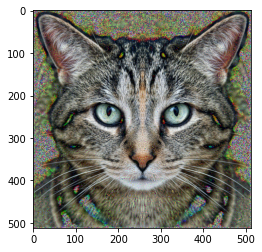

[ Step: 100 ]
Loss: 0.25408875942230225


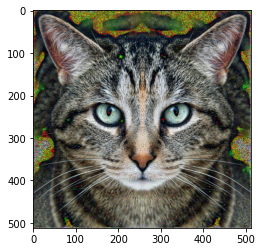

[ Step: 150 ]
Loss: 0.24186593294143677


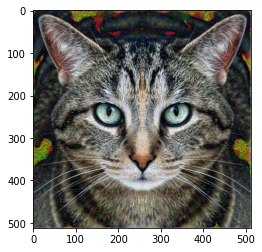

[ Step: 200 ]
Loss: 0.2365257740020752


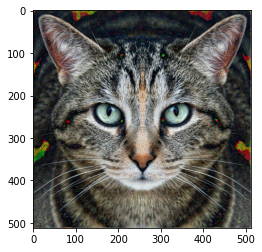

[ Step: 250 ]
Loss: 0.23967397212982178


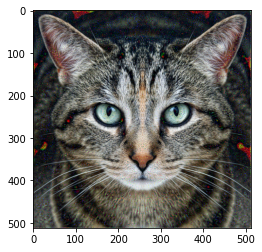

[ Step: 300 ]
Loss: 0.23553478717803955


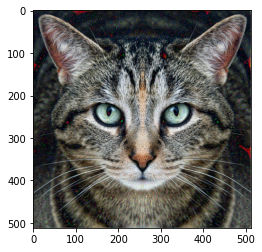

In [8]:
module = SSIM(data_range=1, channel=3)
noise = torch.empty_like(target_image).uniform_(0, 1).to(device)

iters = 300
lr = 1e4

print("[ Start ]")
imshow(noise)

for i in range(iters):
    noise.requires_grad = True

    ssim_loss = 1 - module(noise, target_image)
    ssim_loss.backward()

    gradient = lr * noise.grad
    noise = torch.clamp(noise - gradient, min=0, max=1).detach_()

    if (i + 1) % 50 == 0:
        print(f'[ Step: {i + 1} ]')
        print(f'Loss: {ssim_loss.item()}')
        imshow(noise)

[ Start ]


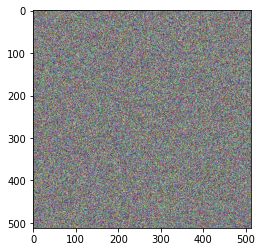

[ Step: 50 ]
Loss: 0.38418036699295044


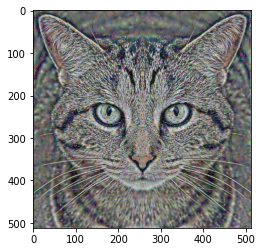

[ Step: 100 ]
Loss: 0.008586227893829346


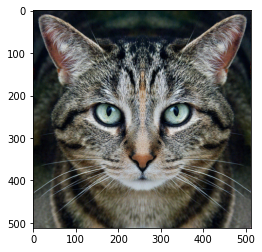

[ Step: 150 ]
Loss: 0.00010329484939575195


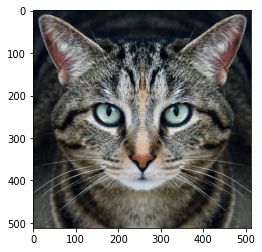

[ Step: 200 ]
Loss: 6.4373016357421875e-06


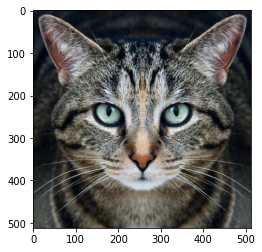

In [9]:
module = SSIM(data_range=1, channel=3)
noise = torch.empty_like(target_image).uniform_(0, 1).to(device)

iters = 200
noise.requires_grad=True
optimizer = optim.Adam([noise], lr=0.01)

print("[ Start ]")
imshow(noise)

for i in range(iters):
    optimizer.zero_grad()

    ssim_loss = 1 - module(noise, target_image)
    ssim_loss.backward()

    optimizer.step()

    if (i + 1) % 50 == 0:
        print(f'[ Step: {i + 1} ]')
        print(f'Loss: {ssim_loss.item()}')
        imshow(torch.clamp(noise, min=0, max=1))

[ Start ]


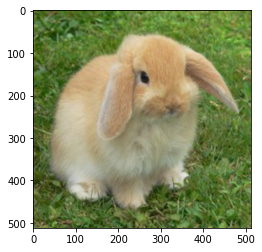

[ Step: 40 ]
Loss: 0.1576477289199829


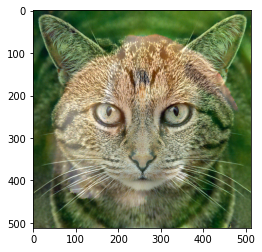

[ Step: 80 ]
Loss: 0.04139667749404907


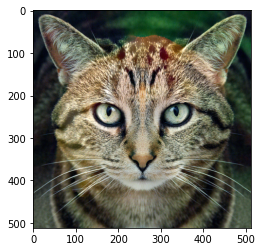

[ Step: 120 ]
Loss: 0.00556182861328125


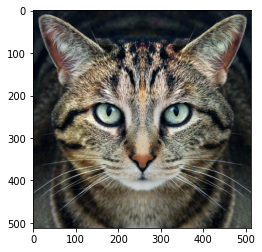

[ Step: 160 ]
Loss: 0.0006330013275146484


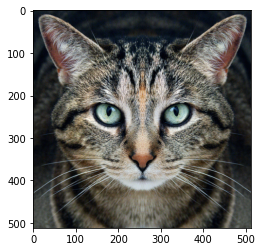

[ Step: 200 ]
Loss: 7.18832015991211e-05


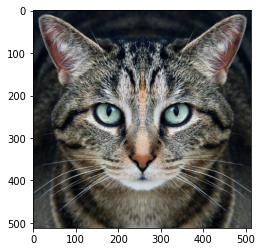

In [10]:
module = SSIM(data_range=1, channel=3)
img_path = './images/bunny.jpg'
source = image_loader(img_path, (512, 512))

iters = 200
source.requires_grad=True
optimizer = optim.Adam([source], lr=0.01)

print("[ Start ]")
imshow(source)

for i in range(iters):
    optimizer.zero_grad()

    ssim_loss = 1 - module(source, target_image)
    ssim_loss.backward()

    optimizer.step()

    if (i + 1) % 40 == 0:
        print(f'[ Step: {i + 1} ]')
        print(f'Loss: {ssim_loss.item()}')
        imshow(torch.clamp(source, min=0, max=1))

#### <b>PyTorch MS-SSIM</b>

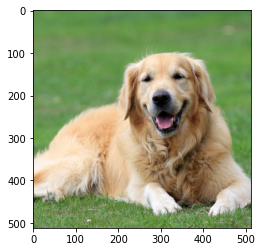

In [11]:
img_path = './images/dog.jpg'
target_image = image_loader(img_path, (512, 512))
imshow(target_image)

[ Start ]


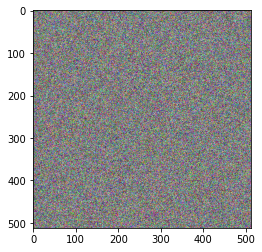

[ Step: 50 ]
Loss: 0.28185176849365234


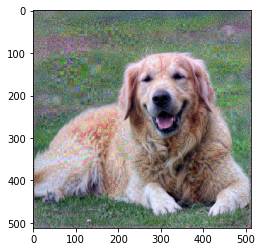

[ Step: 100 ]
Loss: 0.30016446113586426


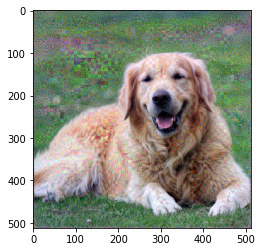

[ Step: 150 ]
Loss: 0.2818434238433838


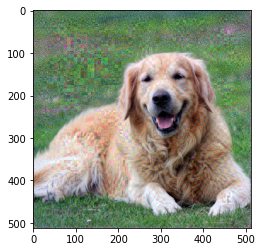

[ Step: 200 ]
Loss: 0.2788088917732239


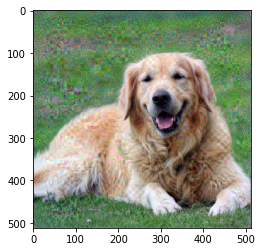

[ Step: 250 ]
Loss: 0.292022705078125


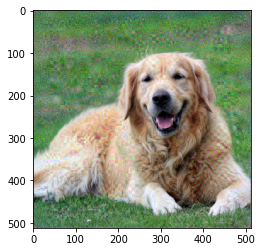

[ Step: 300 ]
Loss: 0.27683746814727783


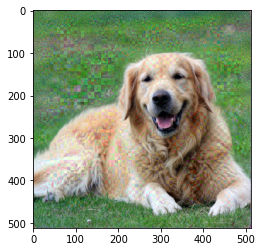

In [12]:
module = MS_SSIM(data_range=1, channel=3)
noise = torch.empty_like(target_image).uniform_(0, 1).to(device)

iters = 300
lr = 1e4

print("[ Start ]")
imshow(noise)

for i in range(iters):
    noise.requires_grad = True

    ssim_loss = 1 - module(noise, target_image)
    ssim_loss.backward()

    gradient = lr * noise.grad
    noise = torch.clamp(noise - gradient, min=0, max=1).detach_()

    if (i + 1) % 50 == 0:
        print(f'[ Step: {i + 1} ]')
        print(f'Loss: {ssim_loss.item()}')
        imshow(noise)

[ Start ]


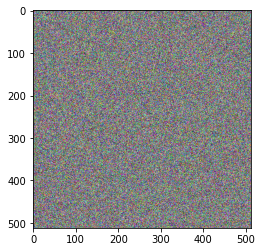

[ Step: 50 ]
Loss: 0.15816223621368408


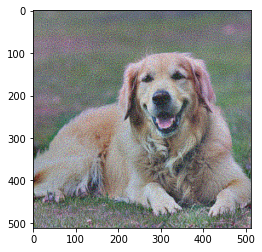

[ Step: 100 ]
Loss: 0.06939935684204102


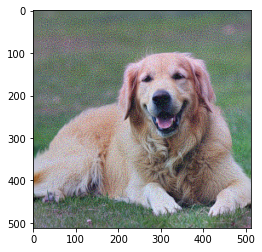

[ Step: 150 ]
Loss: 0.0477064847946167


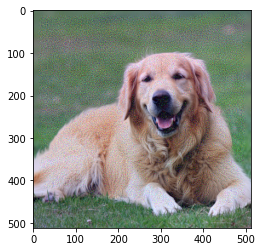

[ Step: 200 ]
Loss: 0.03620225191116333


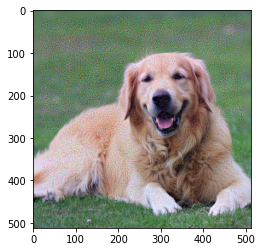

In [13]:
module = MS_SSIM(data_range=1, channel=3)
noise = torch.empty_like(target_image).uniform_(0, 1).to(device)

iters = 200
noise.requires_grad=True
optimizer = optim.Adam([noise], lr=0.01)

print("[ Start ]")
imshow(noise)

for i in range(iters):
    optimizer.zero_grad()

    ssim_loss = 1 - module(noise, target_image)
    ssim_loss.backward()

    optimizer.step()

    if (i + 1) % 50 == 0:
        print(f'[ Step: {i + 1} ]')
        print(f'Loss: {ssim_loss.item()}')
        imshow(torch.clamp(noise, min=0, max=1))

[ Start ]


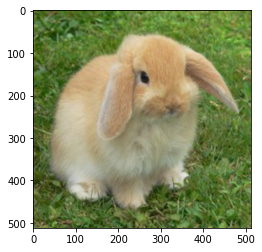

[ Step: 30 ]
Loss: 0.12393176555633545


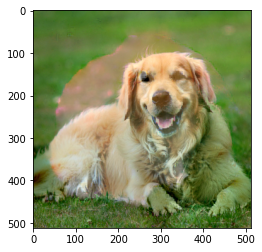

[ Step: 60 ]
Loss: 0.023920178413391113


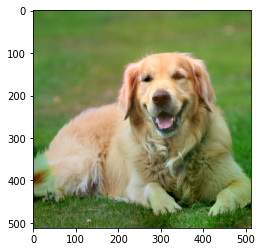

[ Step: 90 ]
Loss: 0.005528271198272705


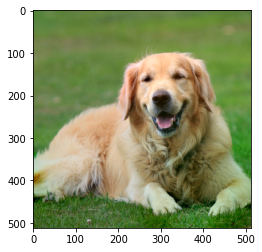

[ Step: 120 ]
Loss: 0.002530813217163086


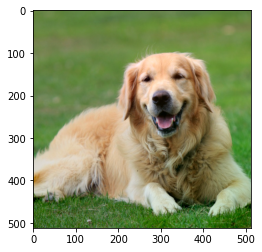

[ Step: 150 ]
Loss: 0.0015938282012939453


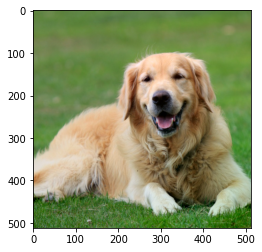

[ Step: 180 ]
Loss: 0.0010965466499328613


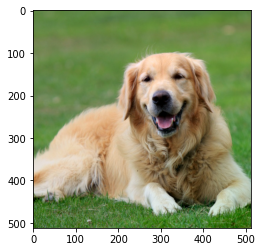

[ Step: 210 ]
Loss: 0.0007732510566711426


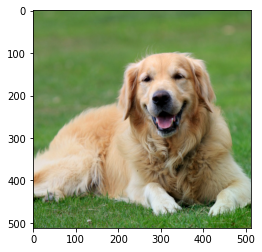

[ Step: 240 ]
Loss: 0.0005488395690917969


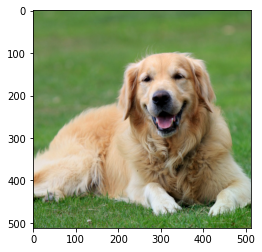

[ Step: 270 ]
Loss: 0.0003905296325683594


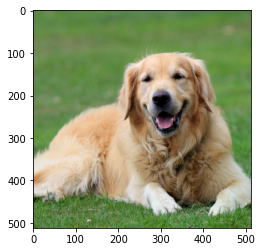

[ Step: 300 ]
Loss: 0.00027942657470703125


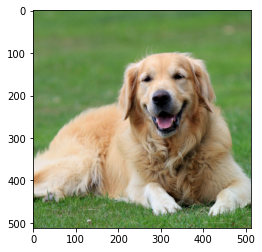

In [14]:
module = MS_SSIM(data_range=1, channel=3)
img_path = './images/bunny.jpg'
source = image_loader(img_path, (512, 512))

iters = 300
source.requires_grad=True
optimizer = optim.Adam([source], lr=0.01)

print("[ Start ]")
imshow(source)

for i in range(iters):
    optimizer.zero_grad()

    ssim_loss = 1 - module(source, target_image)
    ssim_loss.backward()

    optimizer.step()

    if (i + 1) % 30 == 0:
        print(f'[ Step: {i + 1} ]')
        print(f'Loss: {ssim_loss.item()}')
        imshow(torch.clamp(source, min=0, max=1))

#### <b>Make an Animation</b>

In [15]:
!mkdir -p saved

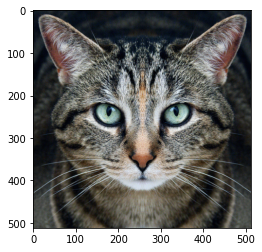

In [16]:
img_path = './images/cat.jpg'
target_image = image_loader(img_path, (512, 512))
imshow(target_image)

[ Start ]


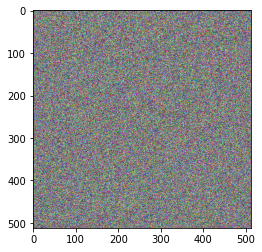

[ Step: 50 ]
Loss: 0.30049943923950195


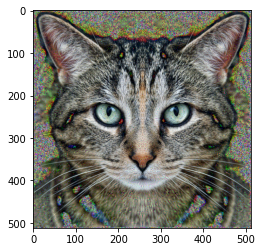

[ Step: 100 ]
Loss: 0.2540462613105774


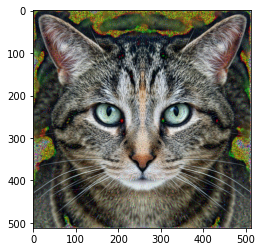

[ Step: 150 ]
Loss: 0.24181729555130005


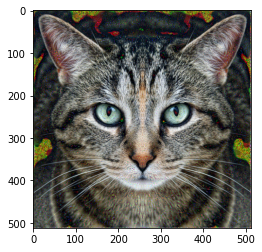

[ Step: 200 ]
Loss: 0.23805058002471924


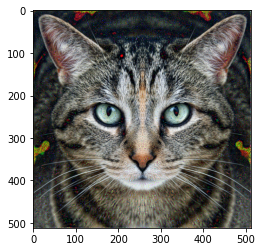

[ Step: 250 ]
Loss: 0.2390621304512024


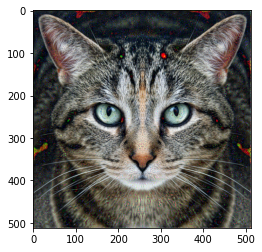

[ Step: 300 ]
Loss: 0.23698502779006958


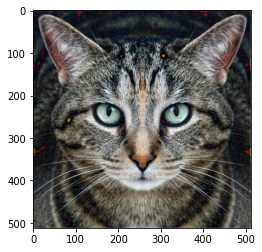

[ Step: 350 ]
Loss: 0.23593783378601074


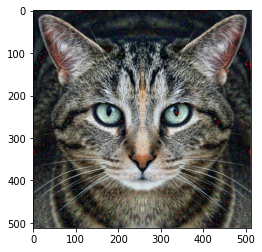

[ Step: 400 ]
Loss: 0.23840618133544922


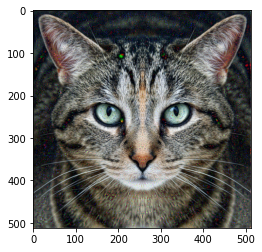

In [17]:
module = SSIM(data_range=1, channel=3)
noise = torch.empty_like(target_image).uniform_(0, 1).to(device)

iters = 400
lr = 1e4

print("[ Start ]")
imshow(noise)

for i in range(iters):
    noise.requires_grad = True

    ssim_loss = 1 - module(noise, target_image)
    ssim_loss.backward()

    gradient = lr * noise.grad
    noise = torch.clamp(noise - gradient, min=0, max=1).detach_()
    save_image(noise[0], f'saved/image{str(i + 1).zfill(4)}.png')

    if (i + 1) % 50 == 0:
        print(f'[ Step: {i + 1} ]')
        print(f'Loss: {ssim_loss.item()}')
        imshow(noise)

In [18]:
files_path = "./saved"
files = sorted([os.path.join(files_path, file) for file in os.listdir(files_path)])
print('The number of files:', len(files))

images = []
for filename in files:
    images.append(np.array(Image.fromarray(imageio.imread(filename)).resize((256, 256))))
imageio.mimsave('output.gif', images, format='GIF', fps=20)

The number of files: 400
